# Concepts of Simple Linear Regression
### Less complex problem

In [16]:
"""import necessary modules"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [17]:
"""creating example datapoints"""
np.random.seed(42)
m = 200
X = 2 * np.random.rand(m, 1)
print(X)

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [0.39

In [18]:
"""define an equation: true DGP"""
y = 4 + 3 * X + np.random.randn(m, 1)
print(y)

[[ 5.56721599]
 [ 9.93653954]
 [ 8.68503612]
 [ 6.87759949]
 [ 6.80188635]
 [ 5.40980004]
 [ 3.15719818]
 [ 9.85361048]
 [ 6.6320084 ]
 [ 9.03552007]
 [ 5.28210254]
 [ 8.99877679]
 [ 9.95803197]
 [ 5.68681559]
 [ 5.91300996]
 [ 6.99722004]
 [ 5.58006534]
 [ 6.39480243]
 [ 5.70215568]
 [ 4.93156456]
 [ 7.59401566]
 [ 5.17811514]
 [ 6.02955869]
 [ 7.02535431]
 [ 6.7494218 ]
 [10.16458985]
 [ 4.93338586]
 [ 9.8055758 ]
 [ 8.18015476]
 [ 3.42154492]
 [ 6.57437661]
 [ 5.50561716]
 [ 4.16684677]
 [10.40731372]
 [10.26702982]
 [ 8.77755518]
 [ 4.9808889 ]
 [ 3.07118546]
 [ 7.65888321]
 [ 7.49731376]
 [ 4.94632315]
 [ 5.72532268]
 [ 4.37951205]
 [ 9.84123979]
 [ 4.66882245]
 [ 8.12885881]
 [ 5.92847517]
 [ 5.97743783]
 [ 7.63804904]
 [ 5.66991126]
 [10.90055901]
 [ 9.70459899]
 [ 8.25932428]
 [ 8.43113906]
 [ 8.10243514]
 [10.04503136]
 [ 5.0460027 ]
 [ 9.02862867]
 [ 4.84225424]
 [ 7.08754762]
 [ 7.2860655 ]
 [ 6.27948544]
 [ 8.65715581]
 [ 6.89948918]
 [ 4.91278184]
 [ 7.01935789]
 [ 4.36018

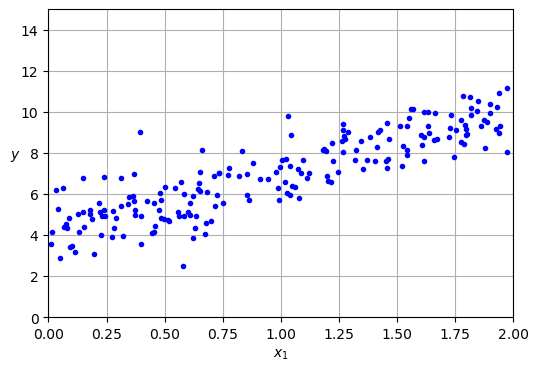

In [19]:
"""plot the datapoints"""
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

## Manual Way

In [20]:
"""calculating theta by using the equation"""
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.10520115],
       [2.96096447]])

In [21]:
"""prediction by using this above theta value"""
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.10520115],
       [10.02713008]])

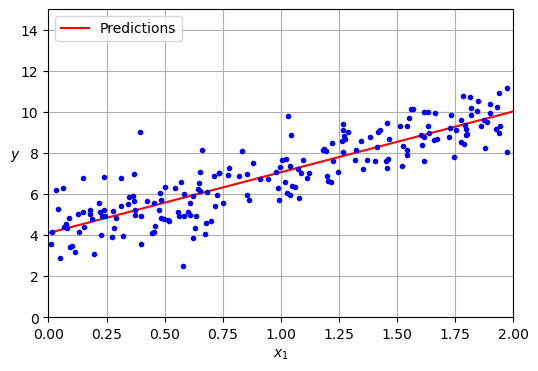

In [22]:
"""plot regression line"""
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

## Automatic Way

In [23]:
"""create and fit the linear regression model: automatically seperates theta values"""
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ 

(array([4.10520115]), array([[2.96096447]]))

In [24]:
"""compute prediction"""
y_prediction = lin_reg.predict(X_new)
y_prediction

array([[ 4.10520115],
       [10.02713008]])

#### Two other ways to compute theta values:

In [25]:
"""way one"""
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.10520115],
       [2.96096447]])

In [26]:
"""way two"""
np.linalg.pinv(X_b) @ y

array([[4.10520115],
       [2.96096447]])

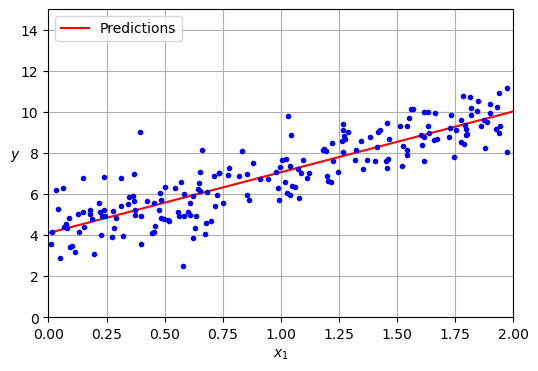

In [27]:
"""plot regression line"""
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_prediction, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

## Gradient Descent to Train Linear Regression Model
### Used when the problem is very complex: Has three different versions
    1. Batch Gradient Descent
    2. Stochastic Gradient Descent
    3. Mini-Batch Gradient Descent

#### Batch Gradient Descent

In [28]:
"""setting parameters"""
learning_rate = 0.1
number_of_epochs = 1000
total_datapoints = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(number_of_epochs):
    gradients = 2 / total_datapoints * X_b.T @ (X_b @ theta - y)
    theta = theta - learning_rate * gradients
theta

array([[4.10520115],
       [2.96096447]])

#### Stochastic Gradient Descent

In [29]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10387581]), array([2.95967267]))